# Exploratory Data Analysis

This notebook focuses on the EDA of the Arrhythmia Dataset.

- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: 
    - 0: "Normal",
    - 1: "Artial Premature",
    - 2: "Premature ventricular contraction",
    - 3: "Fusion of ventricular and normal",
    - 4: "Fusion of paced and normal"

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy

# Data Loading

In [37]:
train_data=pd.read_csv('/content/drive/MyDrive/Git Project/mitbih_train.csv',header=None)
train_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.423611,0.791667,1.000000,0.256944,0.000000,0.277778,0.465278,0.520833,0.472222,0.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.996086,0.694716,0.336595,0.238748,0.268102,0.191781,0.174168,0.164384,0.187867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Getting the descriptives of the numeric data

In [38]:
train_data.loc[:,0:186].describe()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005479,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.046693,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Renaming the labels as per data description

In [39]:
train_data=train_data.replace({187: {0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"}})

# Count plot to visualize the class distribution

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


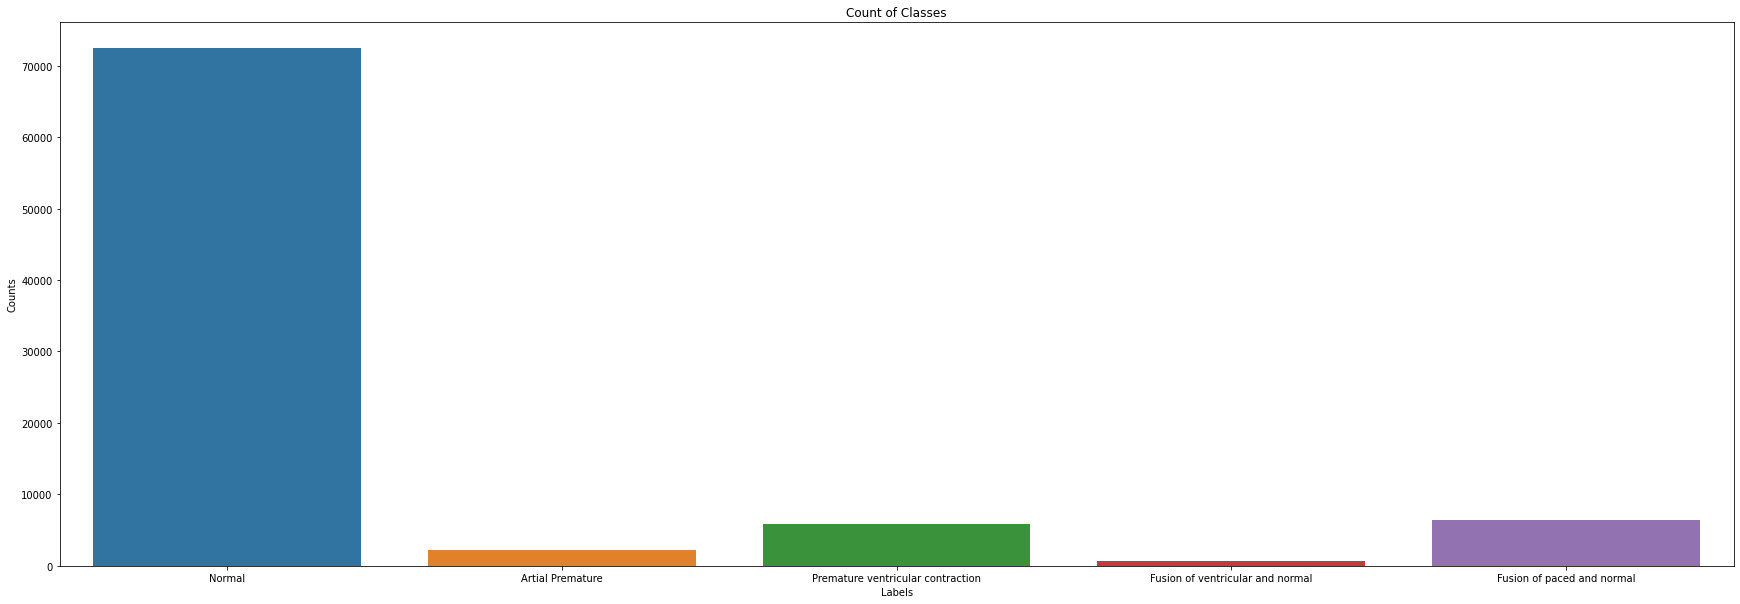

In [42]:
plt.figure(figsize=(30,10))
sns.countplot(train_data[187])
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Count of Classes')
plt.show()

# Fisrt 5 signals of each class

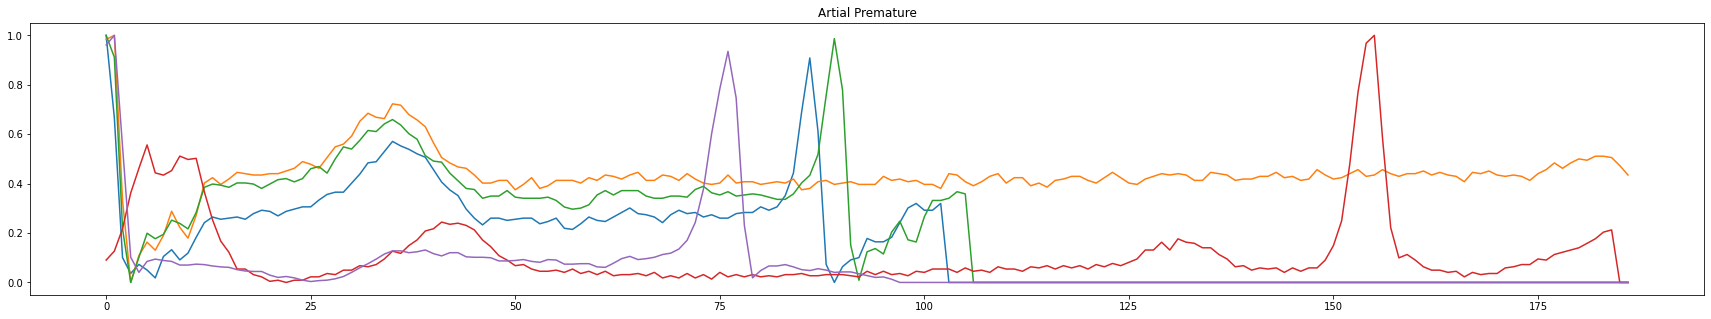

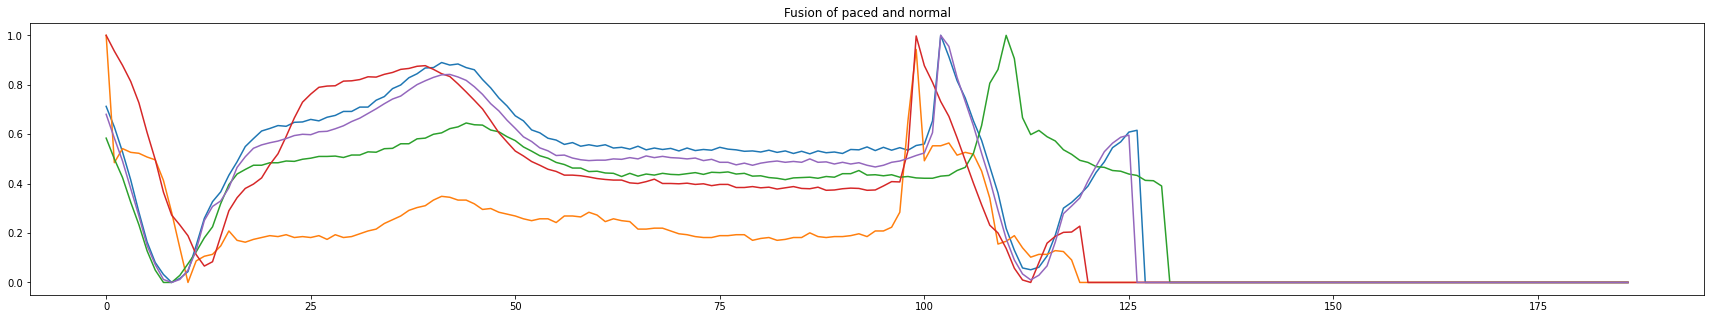

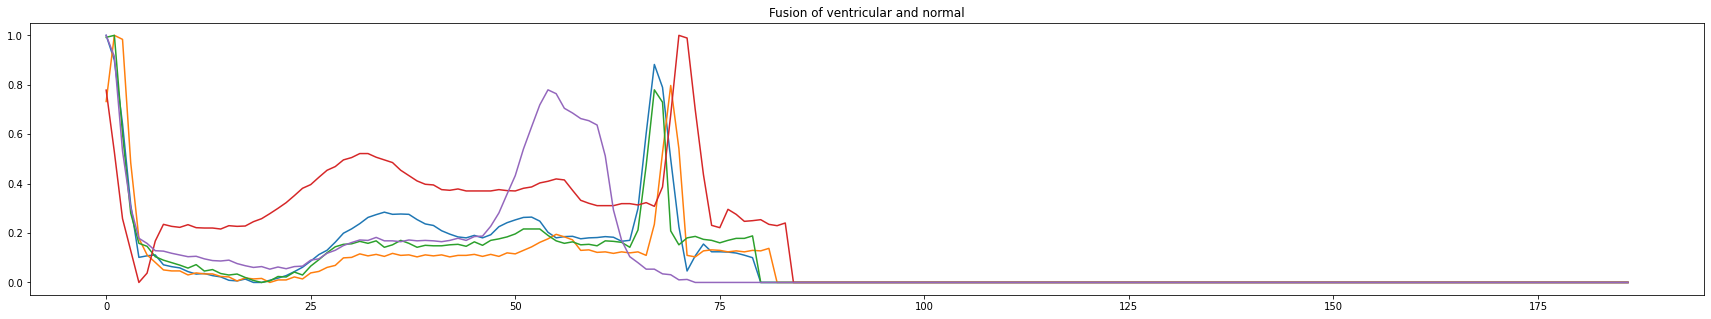

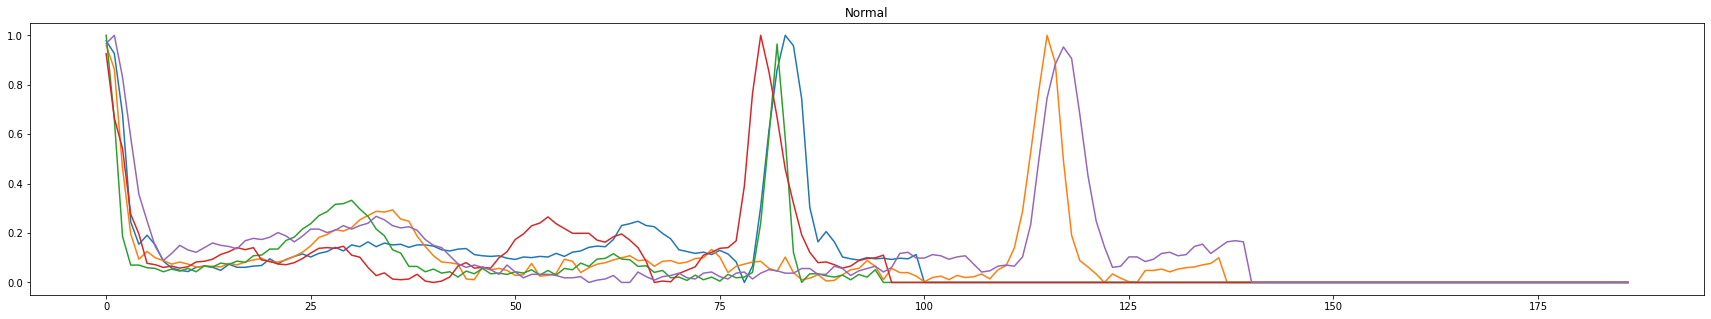

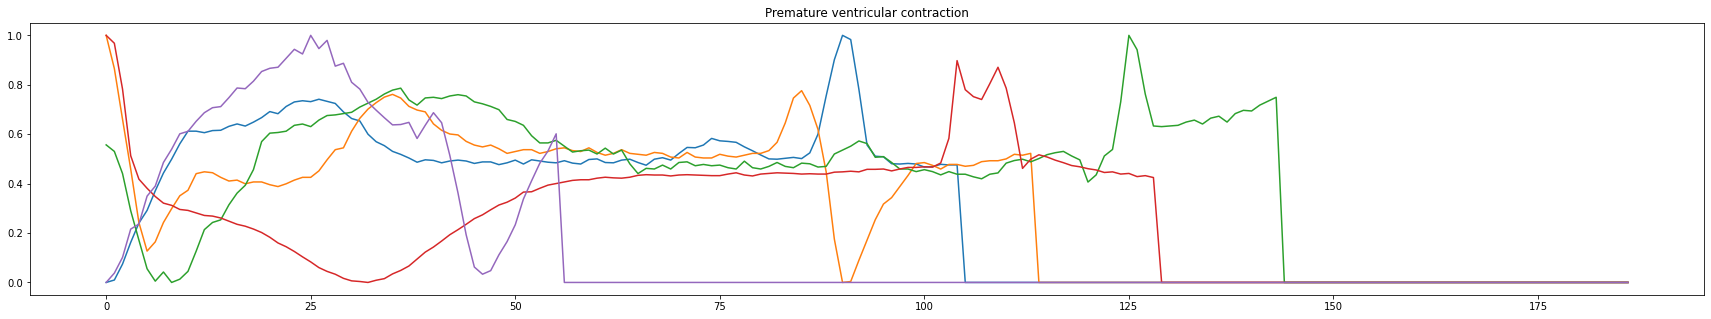

In [41]:
classes=np.unique(train_data[187])
for c in classes:
  idx=list(train_data[train_data[187]==c].index)
  dataset=train_data.loc[idx].iloc[0:5,0:187]
  plt.figure(figsize=(30,5))
  plt.plot(dataset.T)
  plt.title(c)
  plt.show()

# Mean and SD of each class to understand the amount of variation

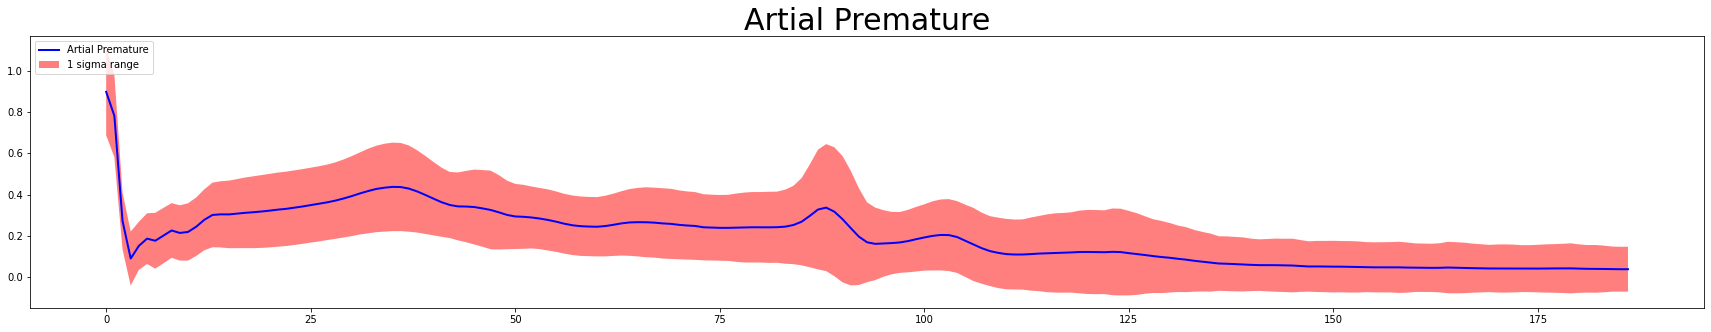

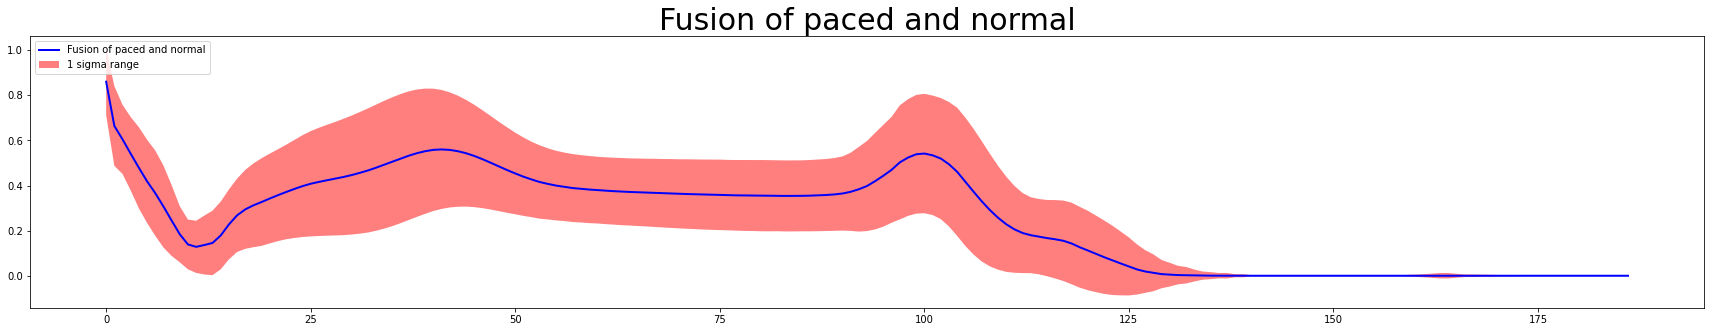

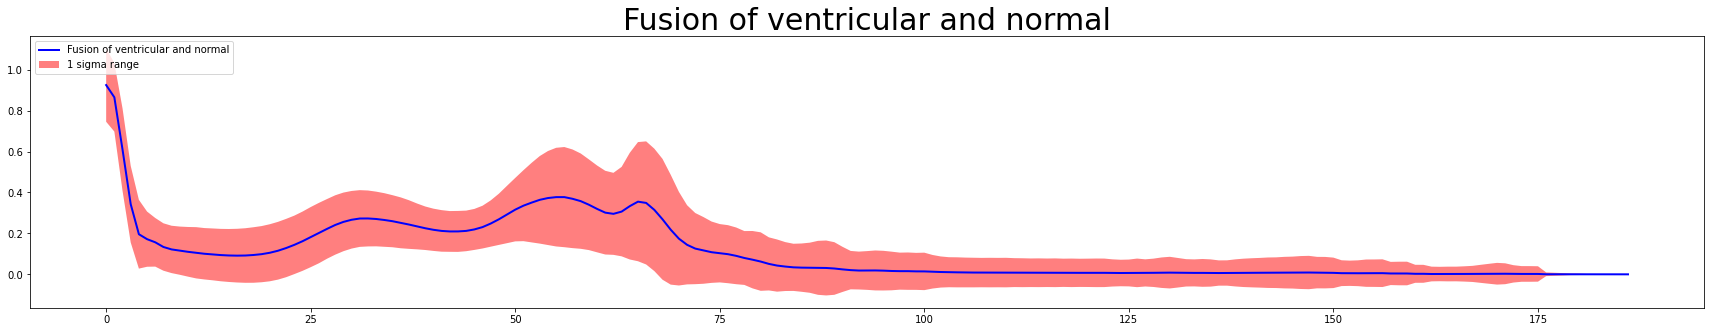

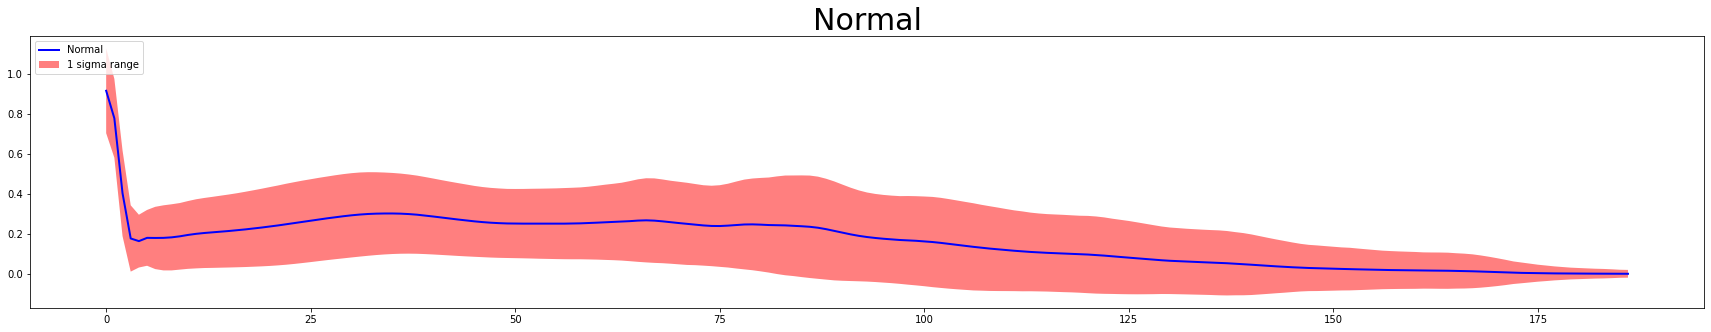

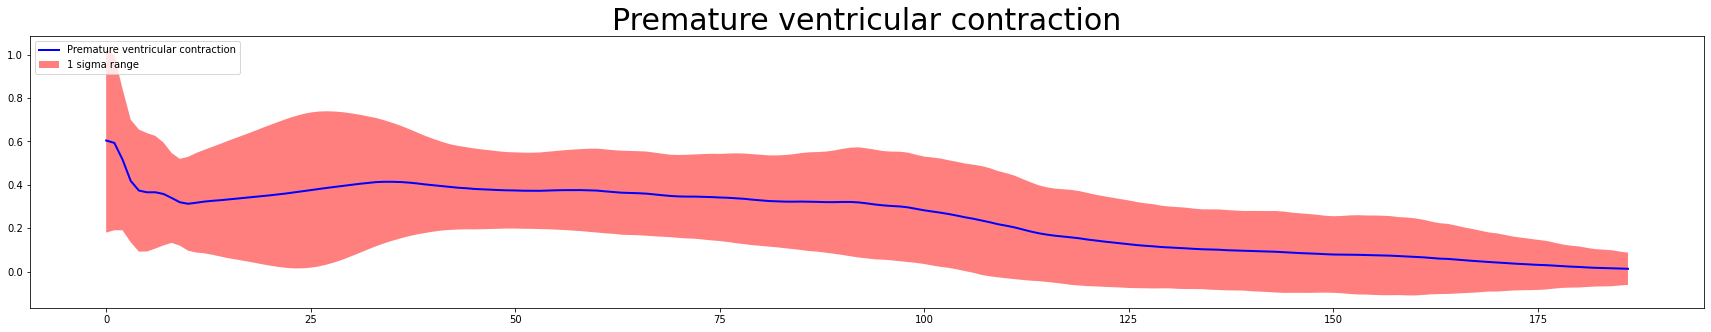

In [43]:
classes=np.unique(train_data[187])
for c in classes:
  idx=list(train_data[train_data[187]==c].index)
  dataset=train_data.loc[idx].iloc[:,0:187]
  meandf=dataset.mean()
  stdf=dataset.std()
  t=np.arange(0,187,1)
  ig, ax = plt.subplots(1,figsize=(30,5))
  ax.plot(t,meandf, lw=2, label=c, color='blue')
  ax.fill_between(t, meandf-stdf, meandf+stdf, facecolor='red', alpha=0.5,
                  label='1 sigma range')
  ax.legend(loc='upper left')
  ax.set_title(c,size=30)
  plt.show()

# Finding the distribution of Max peak height and location

In [ ]:
from scipy.signal import find_peaks

def find_peaks_implement(x,height,show=False):
  peaks, properties = find_peaks(x, height=height,width=2)
  if(len(peaks)==0):
    return (0)
  max_ht=np.max(properties["peak_heights"])
  max_loc=list(x).index(max_ht)
  if(show==True):
    plt.plot(x)
    plt.plot(peaks, x[peaks], "x")
    plt.plot(np.zeros_like(x), "--", color="gray")
    plt.show()
  return (max_ht,max_loc)


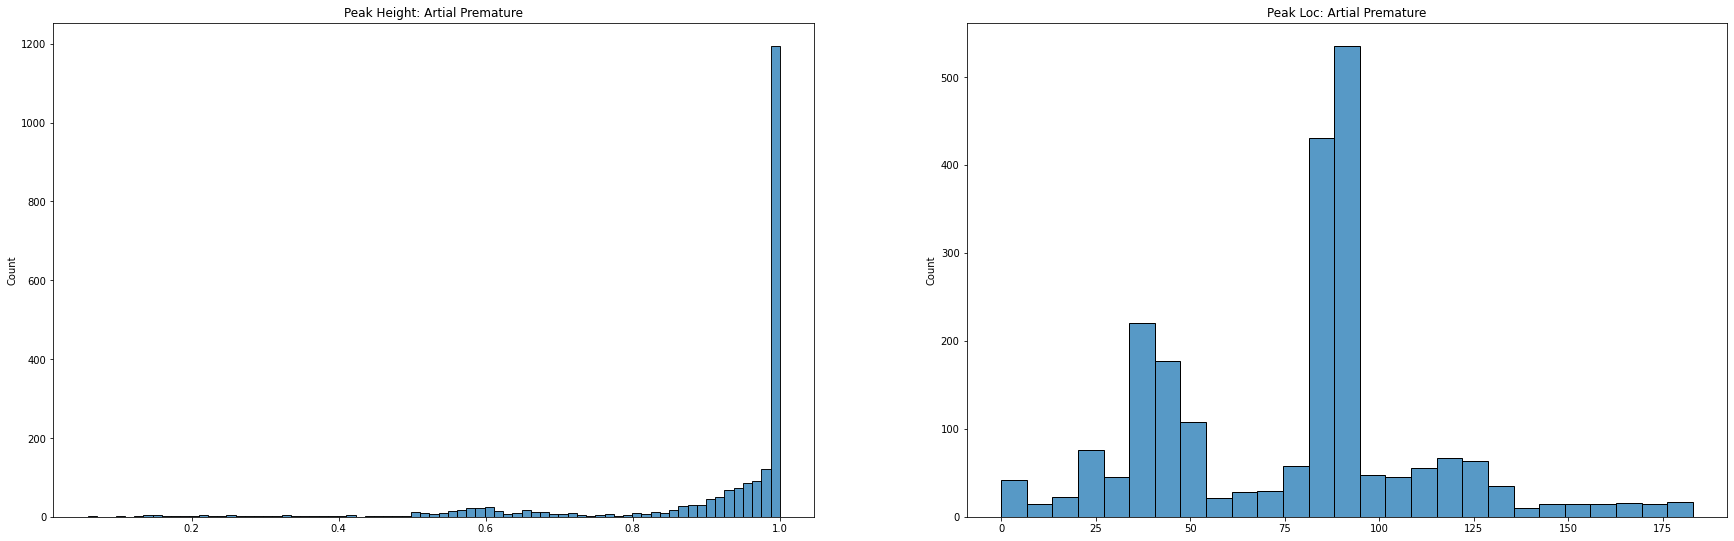

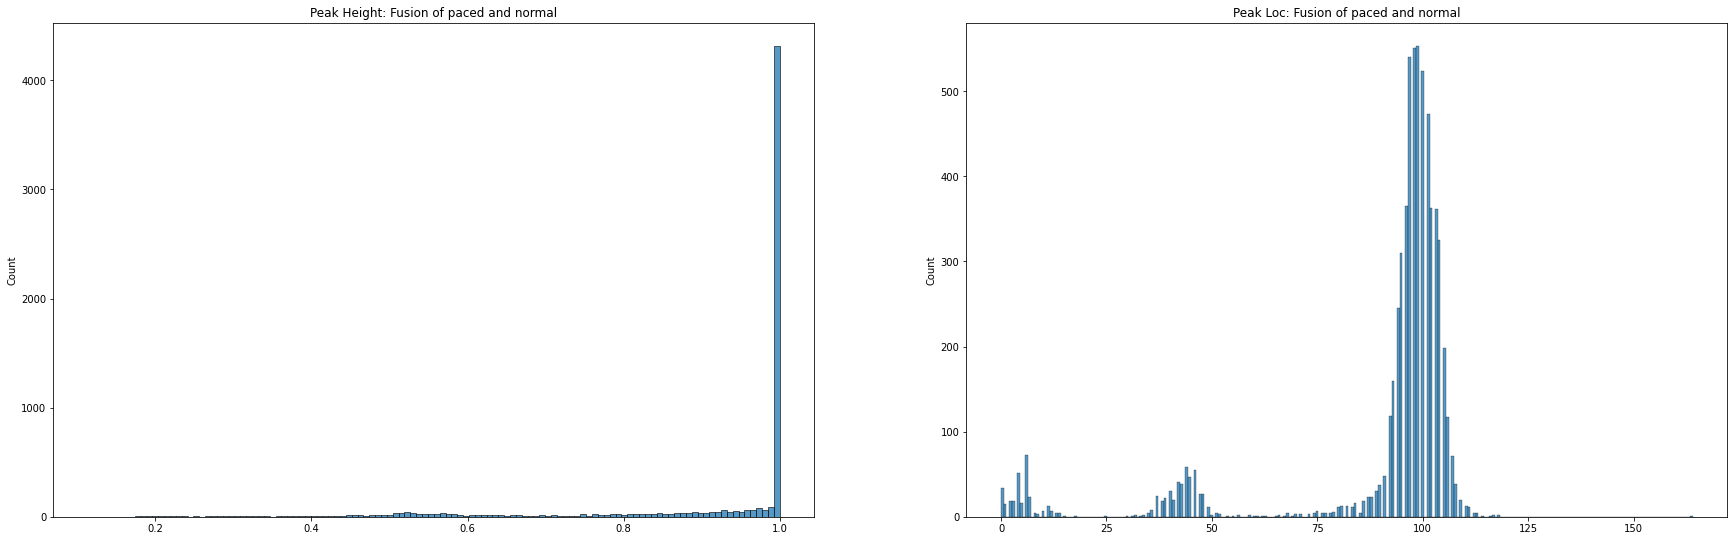

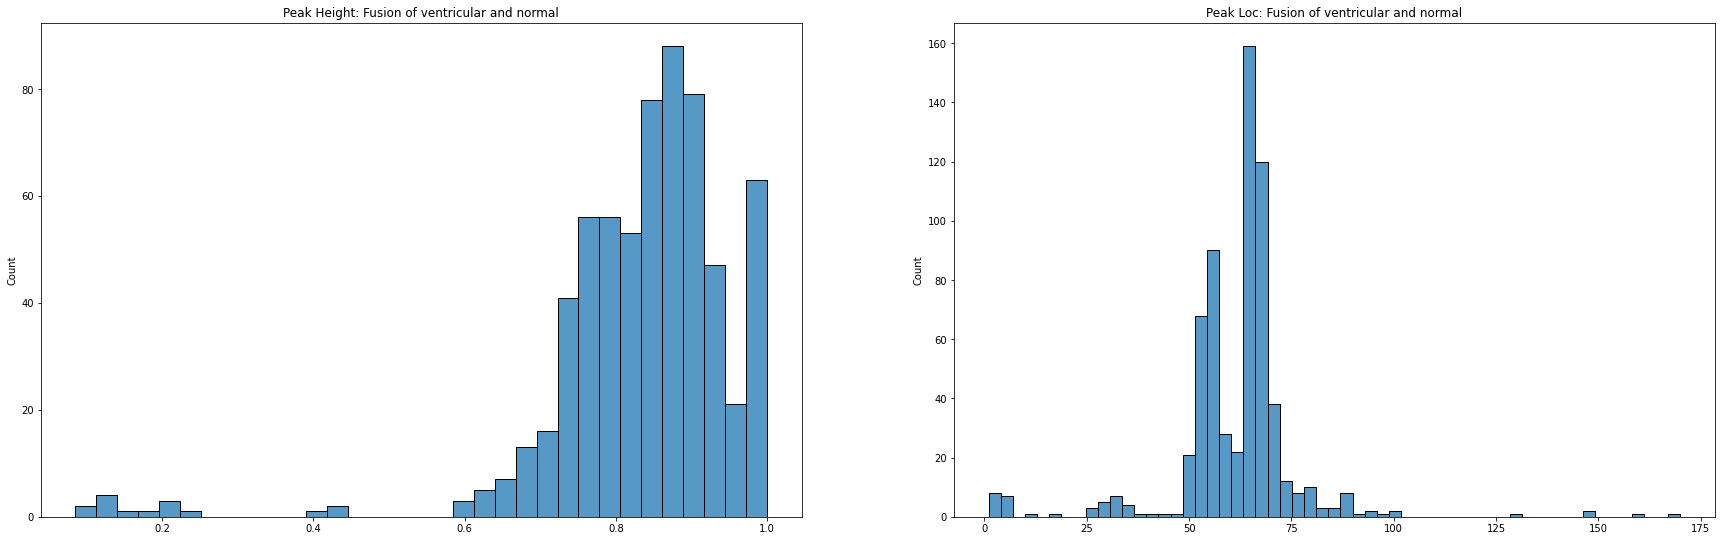

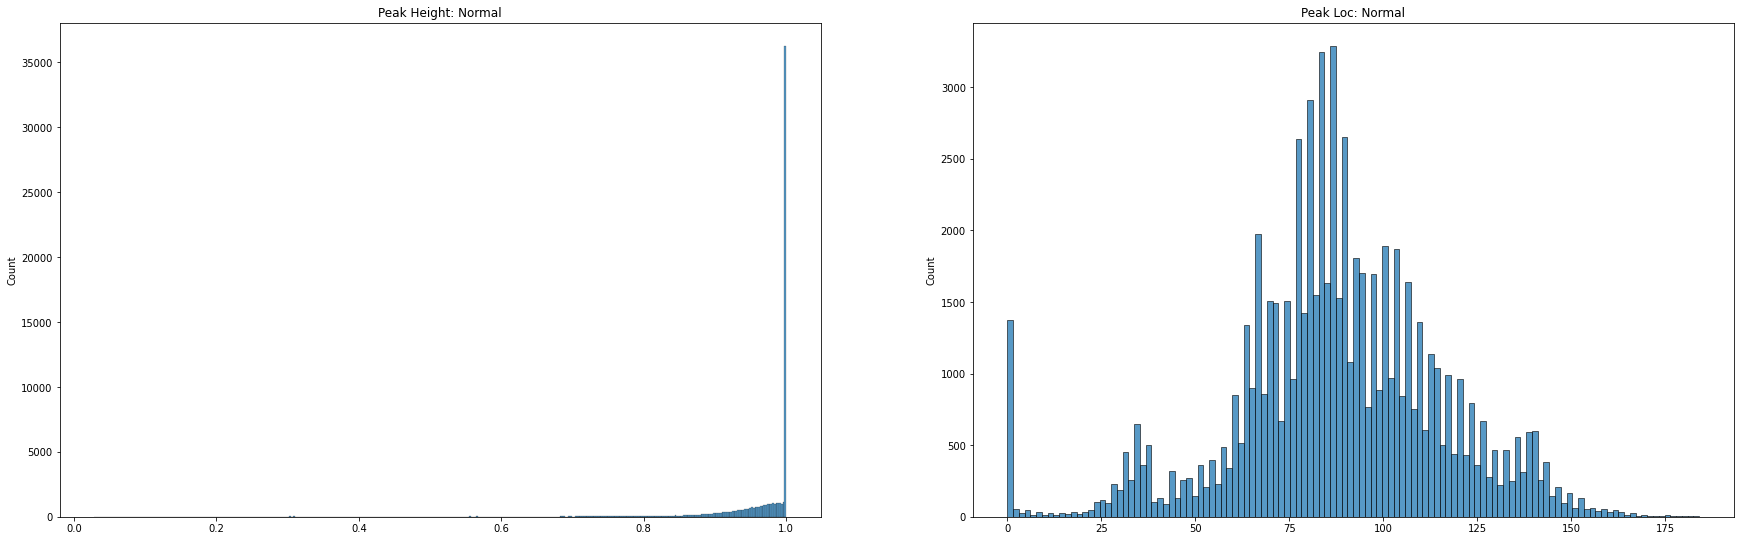

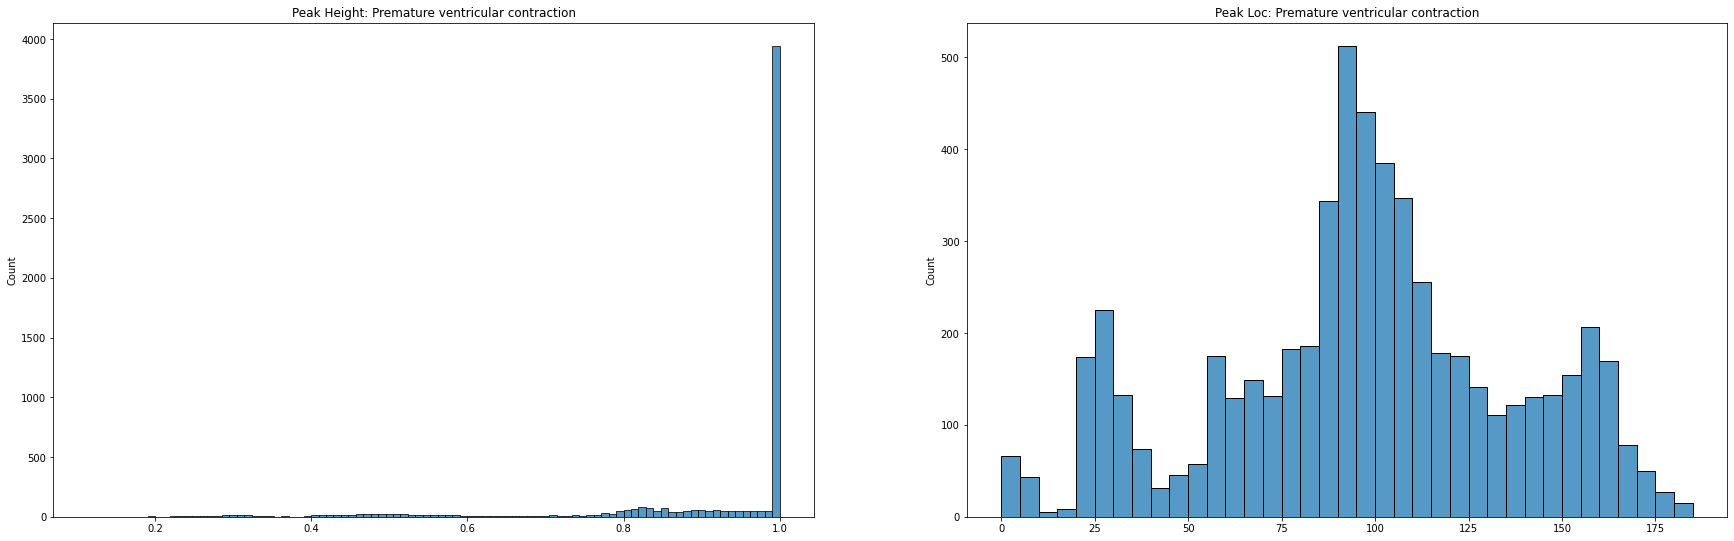

In [87]:
classes=np.unique(train_data[187])
for c in classes:
  idx=list(train_data[train_data[187]==c].index)
  dataset=train_data.loc[idx].iloc[:,0:187]
  max_peak_info=dataset.apply(find_peaks_implement,height=0,show=False,axis=1)
  fig = plt.figure(figsize=(30,20))
  fig.add_subplot(221)
  sns.histplot([i[0] for i in max_peak_info if i!=0])
  plt.title('Peak Height: '+c)
  fig.add_subplot(222)
  sns.histplot([i[1] for i in max_peak_info if i!=0])
  plt.title('Peak Loc: '+c)
  plt.show()
